In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset.csv")

In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Boxplot**

- Box plot is used to identify the outliers
- Outlier is an observation having huge positive value or huge negative value
- Q1 = 25p, Q2 = 50p and Q3 = 75p
- IQR = Inter quartile range = Q3-Q1
- Q3+1.5*IQR and Q1-1.5*IQR

In [ ]:
          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                    
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


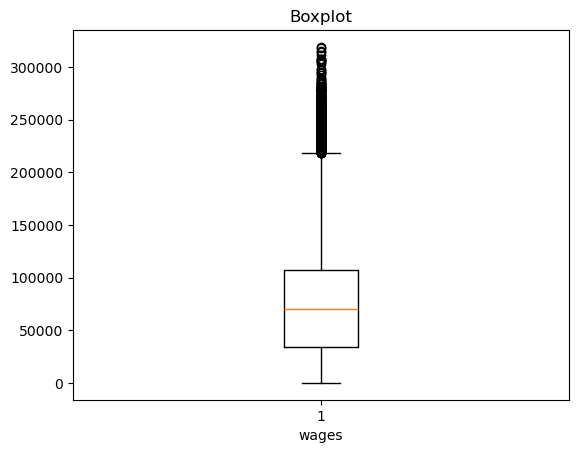

In [8]:
# Read the prevailing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=True)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

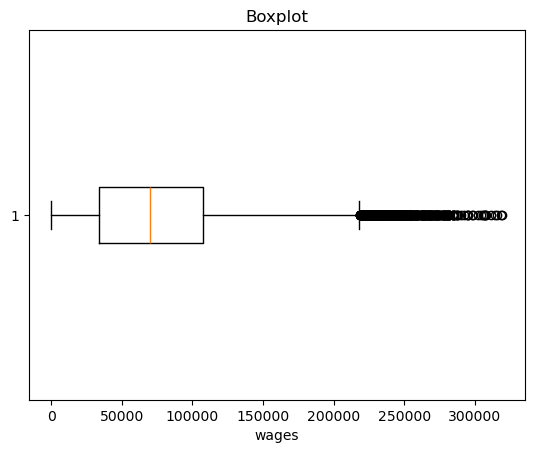

In [9]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

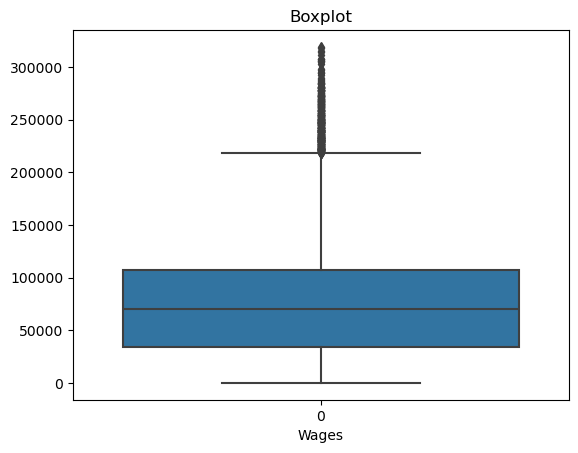

In [11]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

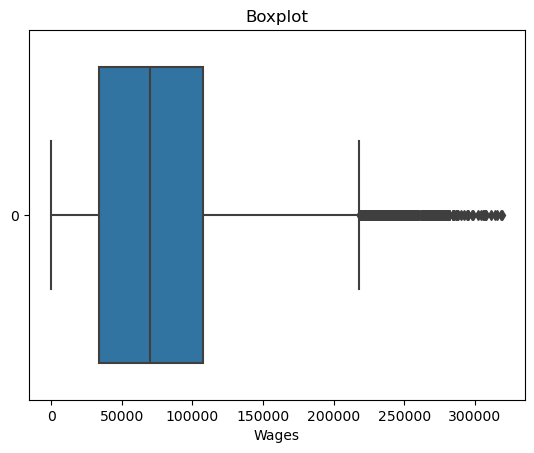

In [13]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data, orient='h')
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

**Plot the histogram plot and box plot side by side**

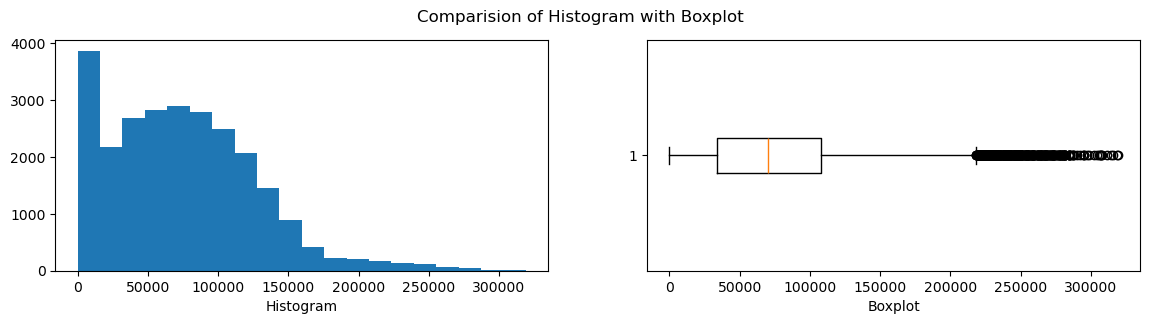

In [22]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data, bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

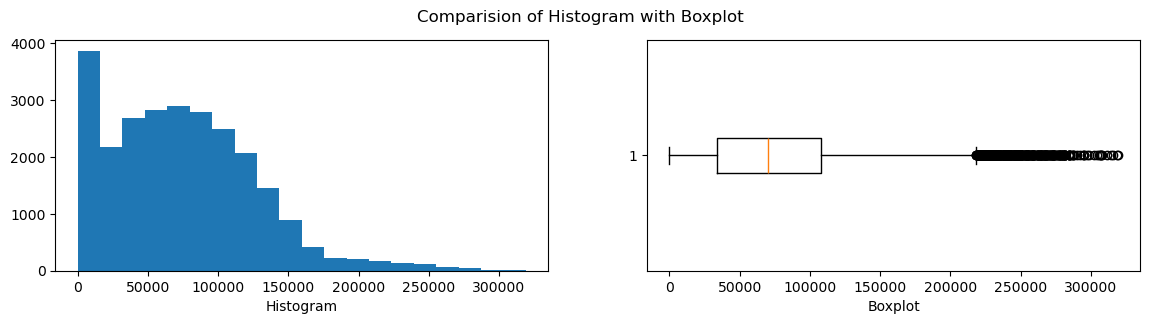

In [23]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')

plt.subplot(1,2,1).hist(wage_data, bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

**Finding the outliers**

- We already know that outliers available less than Q1-1.5*IQR and Q3+1.5IQR
- Step-1:
     - Calculate Q1 = 25p
     - Calculate Q2 = 50p
     - Calculate Q3 = 75p
- Step-2:
     - Calculate IQR = Q3-Q1
- Step-3: 
     - Calculate LB= Q1-1.5*IQR
     - Calculate UB= Q3+1.5*IQR
- Step-4:
     - Con1 = wage data < LB
     - Con2 = wage data > UB
     - Con3 = con1 or-and con2
- Step-5: Data [Con3]

In [8]:
wage_data = visa_df['prevailing_wage']
# step-1
q1 = np.percentile(wage_data, 25)
q2 = np.percentile(wage_data, 50)
q3 = np.percentile(wage_data, 75)

# Step-2
IQR = q3-q1

# Step-3
lb = q1-1.5*IQR
ub = q3+1.5*IQR

# Step-4
con1 = wage_data < lb    # T F
con2 = wage_data > ub    # T F
con3 = con1 | con2

# Bitwise operators used to compare bits data 0 and 1 i.e, True and False

# Step-5
outliers_data = wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [9]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [10]:
wage_data = visa_df['prevailing_wage']
# step-1
q1 = np.percentile(wage_data, 25)
q2 = np.percentile(wage_data, 50)
q3 = np.percentile(wage_data, 75)

# Step-2
IQR = q3-q1

# Step-3
lb = q1-1.5*IQR
ub = q3+1.5*IQR

# Step-4
con1 = wage_data > lb    # T F
con2 = wage_data < ub    # T F
con3 = con1 | con2

# Bitwise operators used to compare bits data 0 and 1 i.e, True and False

# Step-5
non_outliers_df = visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


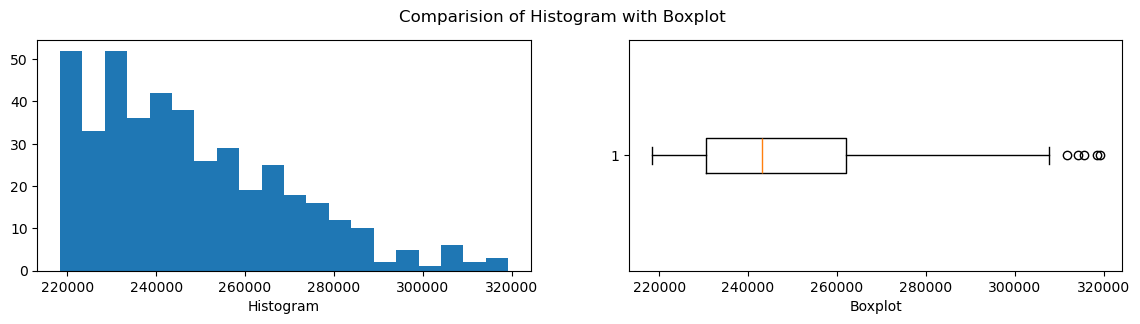

In [18]:
wage_data_outliers=outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_outliers, bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_outliers,vert=False)
plt.xlabel('Boxplot')
plt.show()

- We have two dataframes
- Visa_df: Total data 25480
- non_outliers_df = After removing outliers 25053
- first plot non-outliers data prevailing wage histogram and boxplot

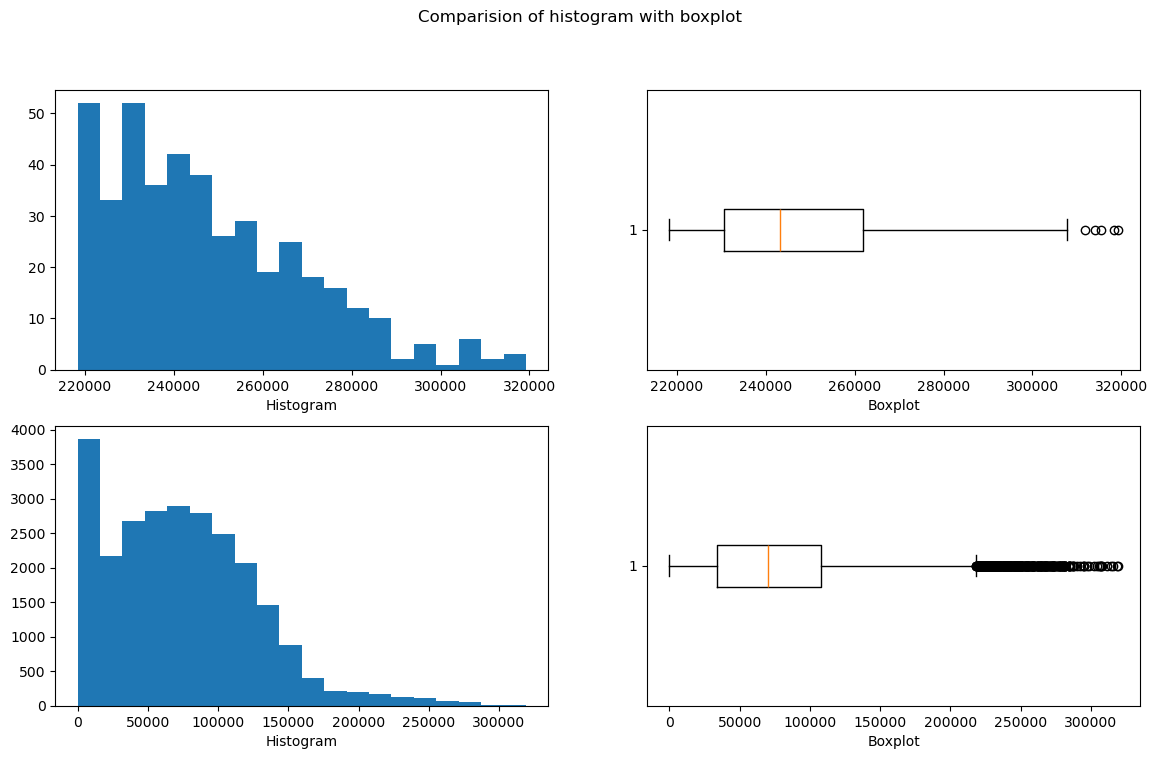

In [20]:
wage_data_non_outliers = non_outliers_df['prevailing_wage']
wage_data_outliers = outliers_df['prevailing_wage']
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of histogram with boxplot')
plt.subplot(2,2,1).hist(wage_data_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_outliers,vert=False)
plt.xlabel('Boxplot')
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot')
plt.show()

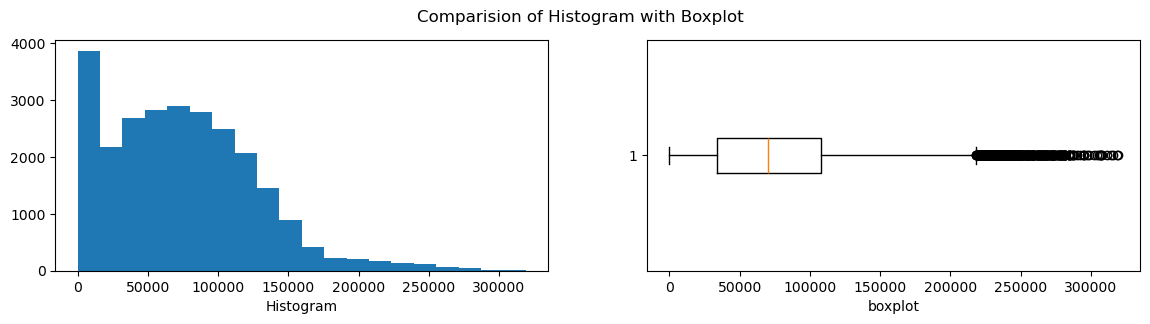

In [15]:
######################### data #######################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
######################## Non outliers ###################
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers, bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()
######################## Entire data ###################

In [ ]:
# Fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with median value
# again draw the plots

In [ ]:
or and

- or behaviour: 
    - Suppose we take two individual conditions
    - if any one true, the final becomes true
- and:
    - Suppose we take two individual conditions
    - Both conditions should be true, the final becomes true

In [ ]:
# Some exam
# age <35
# Degree
you can appear the exam if you have a degree or if less than 35 years old
A: age is 33 years    education: Inter : appear
     True                   False        True

B: age is 37 years    education: Degree 
     False                  True        True

C: age is 33 years    education: Degree 
     True                    True        True

B: age is 37 years    education: Inter 
     False                   False      False

In [4]:
wage_data = visa_df['prevailing_wage']
q1 = np.percentile(wage_data, 25)
q2 = np.percentile(wage_data, 50)
q3 = np.percentile(wage_data, 75)

IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data < lb   
con2 = wage_data > ub    
con3 = con1 | con2
outliers_data = wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [6]:
outliers_df = visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [26]:
wage_data = visa_df['prevailing_wage']
q1 = np.percentile(wage_data, 25)
q2 = np.percentile(wage_data, 50)
q3 = np.percentile(wage_data, 75)
IQR = q3-q1
lb = q1-1.5*IQR
ub = q3+1.5*IQR
con1 = wage_data > lb    
con2 = wage_data < ub   
con3 = con1 | con2
non_outliers_df = visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


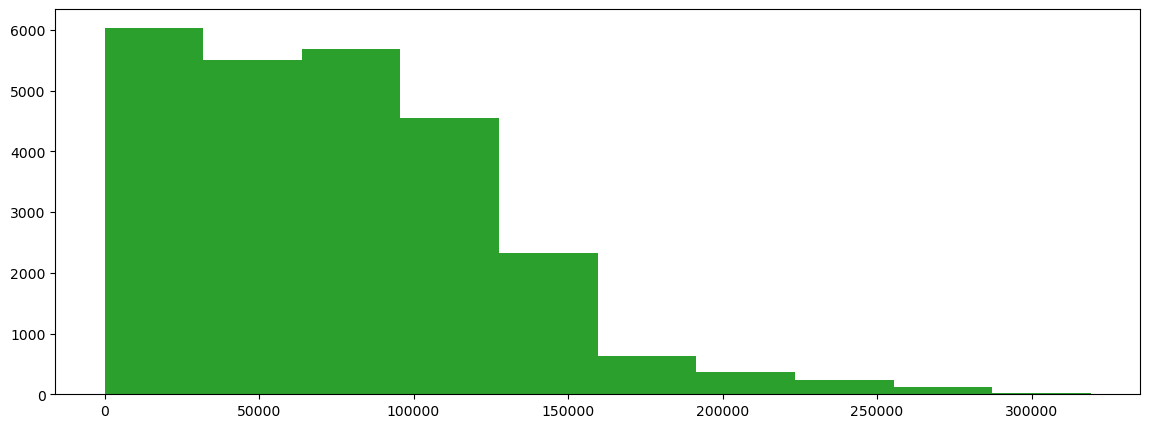

In [40]:
wage_data_outliers = outliers_df['prevailing_wage']
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,5))
plt.hist(wage_data)
plt.hist(wage_data_outliers)
plt.hist(wage_data_non_outliers)

plt.show()

**How to deal the outliers**
- 1. We can drop the outliers
       - Dropping outliers is an easy task, but not recommended
       - If you drop the ouliers we are dropping the rows
       - which means we are dropping the other column values also
       - May be some important information we might loose from other column 
         values
       - But in industry if outlier percentage is less than 2% of the total data,
         we can drop
       - The number of outliers in prevailing wage is 427
       - The number of total observations is 25480
       - The percentage is 1.67 which is less than 2%
- 2. Fill with Median value
       - We already know that outliers does not affect by median
       - so it is best practice to fill the outliers with median
- 3. Capping or Florring
       - Instead of fill with median
       - We can fill with certain values
       - the outliers which are less than LB fill with LB value
       - the outliers which are greater than UB fill with UB value
- **Isolation Forest**
     - It is an ML model used to find the outliers and anamolies

**Fill the Median Value**

**np.where**
- In numpy we have method called where
- It takes two arguments
     - 1. Condition
     - 2. Value if Condition is True
     - 3. Value if condition is False
- It is applicable for only Binary means if and else

In [27]:
list=[]
for value in wage_data:
    if value < lb or value > ub:
        median=wage_data.median()
        list.append(median)
    else:
        list.append(value)

In [28]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [33]:
# Q: I want to replace marks with 1, which are greater than 100
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [34]:
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['New']=l
df

,Sub,marks,New
0,DS,100,100
1,DE,1,1
2,CS,1,1


In [35]:
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks,New
0,DS,100,100
1,DE,1,1
2,CS,1,1


In [36]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [37]:
# np.where (<condition>, <True>, <False>)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [38]:
# Implement for the outliers
wage_data=visa_df['prevailing_wage']
con1 = wage_data<lb
con2 = wage_data>ub
con = con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [39]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

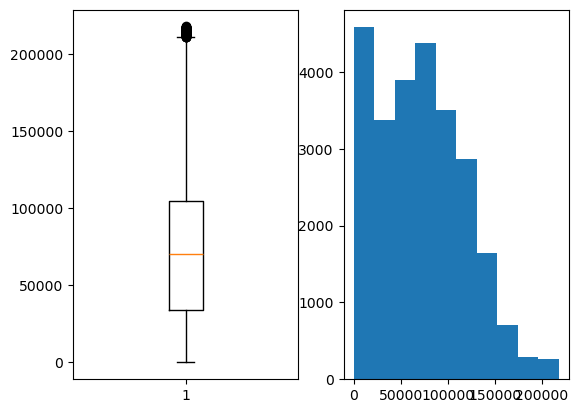

In [41]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])